<a href="https://colab.research.google.com/github/zahia0204/TASK1/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()
import os

os.makedirs('/root/.kaggle', exist_ok=True)

!mv kaggle.json /root/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json
!ls





Saving kaggle.json to kaggle.json
sample_data


In [2]:
!pip install kaggle


In [3]:
import kagglehub


path = kagglehub.dataset_download("vencerlanz09/sea-animals-image-dataste")

print("Path to dataset files:", path)

100%|██████████| 312M/312M [00:03<00:00, 105MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vencerlanz09/sea-animals-image-dataste/versions/5


In [4]:
!ls /root/.cache/kagglehub/datasets/vencerlanz09/sea-animals-image-dataste/versions/5
!cp -r /root/.cache/kagglehub/datasets/vencerlanz09/sea-animals-image-dataste/versions/5 /content/sea_animals






 Clams	  Dolphin  'Jelly Fish'   Octopus   Puffers   'Sea Rays'      Shrimp	 Turtle_Tortoise
 Corals   Eel	    Lobster	  Otter     Seahorse  'Sea Urchins'   Squid	 Whale
 Crabs	  Fish	    Nudibranchs   Penguin   Seal       Sharks	      Starfish


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_gen.flow_from_directory(
    '/content/sea_animals',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = train_gen.flow_from_directory(
    '/content/sea_animals',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 10979 images belonging to 23 classes.
Found 2732 images belonging to 23 classes.


In [7]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, epochs=10, validation_data=val_data)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.1937 - loss: 2.7944 - val_accuracy: 0.3148 - val_loss: 2.2856
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 658s 2s/step - accuracy: 0.3139 - loss: 2.2846 - val_accuracy: 0.3594 - val_loss: 2.0936
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 588s 2s/step - accuracy: 0.3726 - loss: 2.0508 - val_accuracy: 0.4129 - val_loss: 1.9466
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 577s 2s/step - accuracy: 0.4767 - loss: 1.7018 - val_accuracy: 0.4253 - val_loss: 1.9367
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.5945 - loss: 1.3114 - val_accuracy: 0.4176 - val_loss: 2.0058
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 582s 2s/step - accuracy: 0.7126 - loss: 0.9349 - val_accuracy: 0.4096 - val_loss: 2.3913
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 573s 2s/step - accuracy: 0.8235 - loss: 0.5965 - val_accuracy: 0.3792 - val_loss: 2.7100
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 606s 2s/step - accuracy: 0.8896 - loss: 0.3836 - val_accu

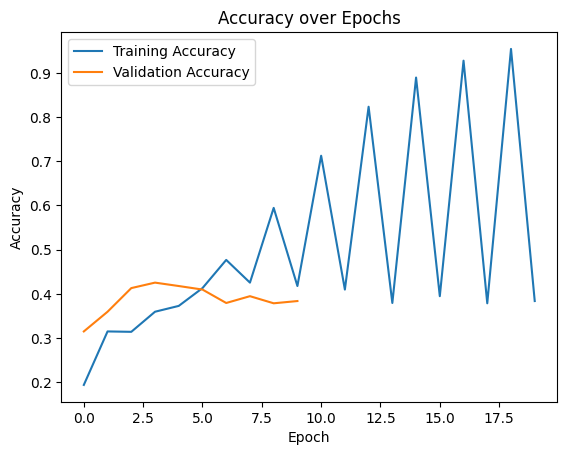

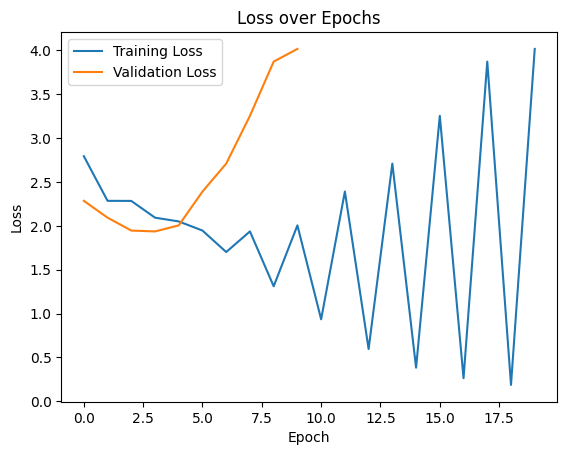

In [10]:
import matplotlib.pyplot as plt
import re

output_string = """
Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.1937 - loss: 2.7944 - val_accuracy: 0.3148 - val_loss: 2.2856
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 658s 2s/step - accuracy: 0.3139 - loss: 2.2846 - val_accuracy: 0.3594 - val_loss: 2.0936
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 588s 2s/step - accuracy: 0.3726 - loss: 2.0508 - val_accuracy: 0.4129 - val_loss: 1.9466
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 577s 2s/step - accuracy: 0.4767 - loss: 1.7018 - val_accuracy: 0.4253 - val_loss: 1.9367
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.5945 - loss: 1.3114 - val_accuracy: 0.4176 - val_loss: 2.0058
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 582s 2s/step - accuracy: 0.7126 - loss: 0.9349 - val_accuracy: 0.4096 - val_loss: 2.3913
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 573s 2s/step - accuracy: 0.8235 - loss: 0.5965 - val_accuracy: 0.3792 - val_loss: 2.7100
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 606s 2s/step - accuracy: 0.8896 - loss: 0.3836 - val_accuracy: 0.3946 - val_loss: 3.2546
Epoch 9/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 585s 2s/step - accuracy: 0.9278 - loss: 0.2640 - val_accuracy: 0.3785 - val_loss: 3.8728
Epoch 10/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.9544 - loss: 0.1871 - val_accuracy: 0.3836 - val_loss: 4.0172
<keras.src.callbacks.history.History at 0x7df52db5f350>
"""

accuracy = [float(x) for x in re.findall(r"accuracy: ([0-9.]+)", output_string)]
val_accuracy = [float(x) for x in re.findall(r"val_accuracy: ([0-9.]+)", output_string)]
loss = [float(x) for x in re.findall(r"loss: ([0-9.]+)", output_string)]
val_loss = [float(x) for x in re.findall(r"val_loss: ([0-9.]+)", output_string)]


plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 460ms/step - accuracy: 0.3869 - loss: 3.9663
Validation Loss: 4.0172
Validation Accuracy: 0.3836
